# Preliminary Visuals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/twitch-data-all.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel              1000 non-null   object 
 1   watch_time_minutes   1000 non-null   int64  
 2   stream_time_minutes  1000 non-null   int64  
 3   peak_viewers         1000 non-null   int64  
 4   average_viewers      1000 non-null   int64  
 5   followers            1000 non-null   int64  
 6   followers_gained     1000 non-null   int64  
 7   views_gained         1000 non-null   int64  
 8   partnered            1000 non-null   bool   
 9   mature               1000 non-null   bool   
 10  language             1000 non-null   object 
 11  ranking              788 non-null    float64
 12  earnings_usd         788 non-null    float64
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 88.0+ KB


In [4]:
pd.set_option('display.float_format', '{:.0f}'.format)
data.describe()

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,ranking,earnings_usd
count,1000,1000,1000,1000,1000,1000,1000,788,788
mean,418427930,120515,37065,4781,570054,205519,11668166,1344,460808
std,549635514,85376,60314,8454,804413,339914,24905722,1785,718980
min,122192850,3465,496,235,3660,-15772,175788,1,23574
25%,163189894,73759,9114,1458,170546,43758,3880602,241,122655
50%,234990788,108240,16676,2425,318063,98352,6456324,646,263527
75%,433739918,141844,37570,4786,624332,236131,12196762,1644,534276
max,6196161750,521445,639375,147643,8938903,3966525,670137548,9977,9626712


## Correlations of continuous variables

In [5]:
continuous_data = data.select_dtypes(include=['number'])
continuous_data = continuous_data.drop(["ranking", "earnings_usd"], axis=1)
correlation = continuous_data.corr(method='spearman')
round(correlation, 3)

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained
watch_time_minutes,1,0,1,1,1,0,1
stream_time_minutes,0,1,-0,-1,-0,-0,0
peak_viewers,1,-0,1,1,1,1,1
average_viewers,1,-1,1,1,1,1,1
followers,1,-0,1,1,1,1,0
followers_gained,0,-0,1,1,1,1,0
views_gained,1,0,1,1,0,0,1


<Axes: >

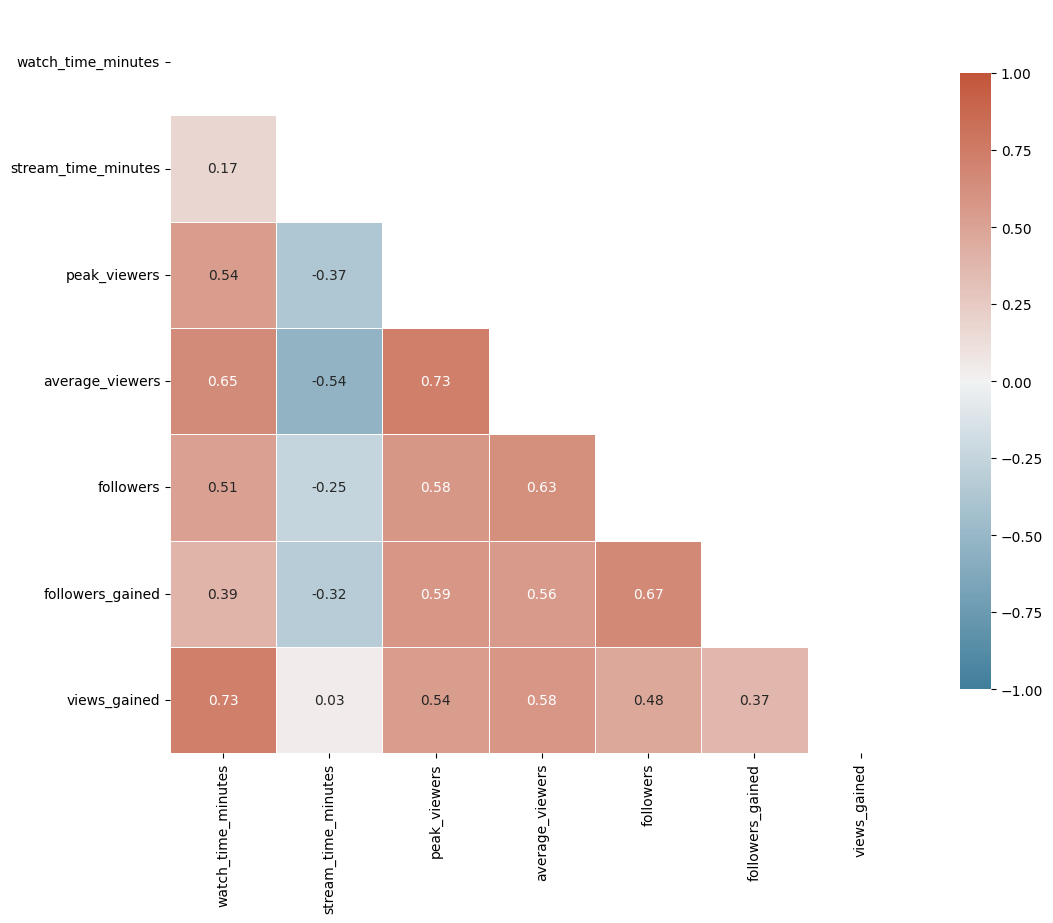

In [6]:
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(
    correlation, 
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .8},
    annot=True,
    fmt=".2f"
)


## Correlations with average viewers

In [7]:
metrics = [
    'watch_time_minutes', 
    'stream_time_minutes', 
    'peak_viewers', 
    'views_gained',
    'followers_gained', 
    'followers'
]
corr_av = correlation['average_viewers']
corr_av = corr_av[metrics].sort_values(ascending=False)
corr_av.index = [x.replace('_', ' ').title() for x in corr_av.index]
corr_av

Peak Viewers           1
Watch Time Minutes     1
Followers              1
Views Gained           1
Followers Gained       1
Stream Time Minutes   -1
Name: average_viewers, dtype: float64

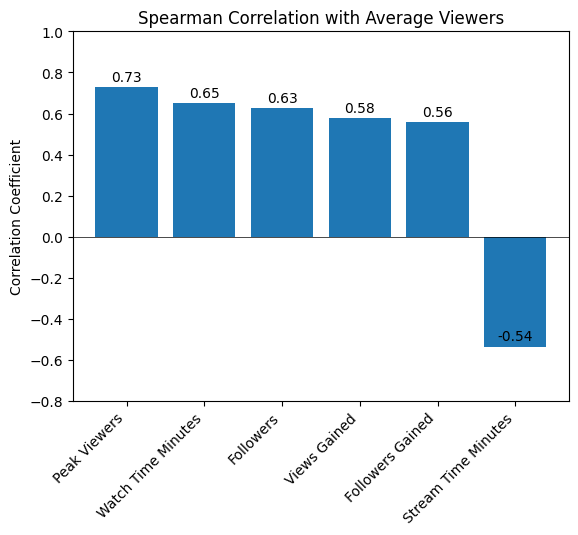

In [8]:
plt.bar(corr_av.index, corr_av.values)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.ylabel('Correlation Coefficient')
plt.title('Spearman Correlation with Average Viewers')
plt.ylim(-0.8, 1)

for i, v in enumerate([x for x in corr_av]):
    plt.text(i, v + 0.03, f'{v:.2f}', ha='center')

**Initial thoughts**
* Potential feedback loop: Channels with high average viewers have higher watch time, more followers, and grow more quickly (views gained and followers gained)
* Surprisingly stream time has a strong negative correlation with avereage viewers

Text(0.5, 1.0, 'Average Viewers vs. Watch Time')

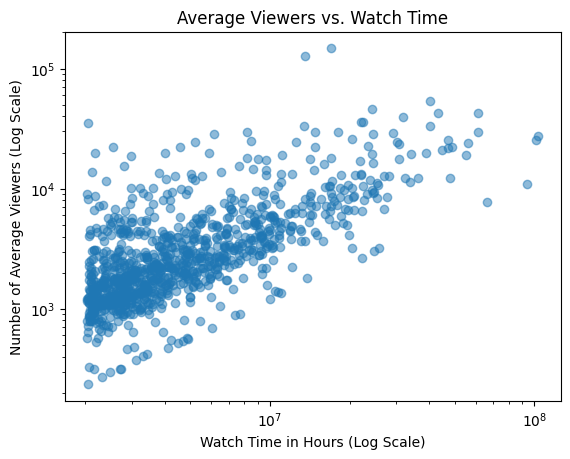

In [9]:
plt.scatter(data['watch_time_minutes']/60, data['average_viewers'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Watch Time in Hours (Log Scale)')
plt.ylabel('Number of Average Viewers (Log Scale)')
plt.title('Average Viewers vs. Watch Time')

Text(0.5, 1.0, 'Average Viewers vs. Stream Time')

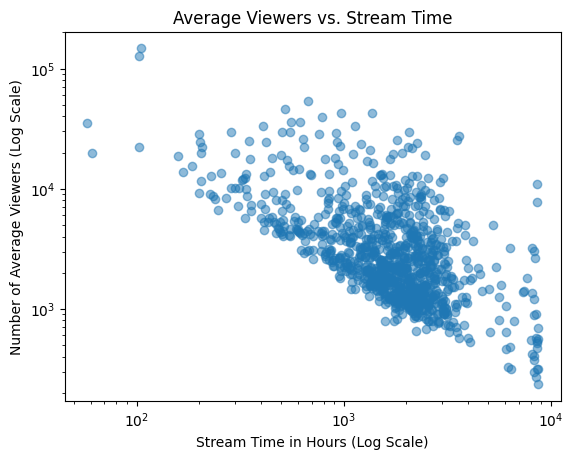

In [10]:
plt.scatter(data['stream_time_minutes']/60, data['average_viewers'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stream Time in Hours (Log Scale)')
plt.ylabel('Number of Average Viewers (Log Scale)')
plt.title('Average Viewers vs. Stream Time')

## Correlations with followers gained

In [28]:
metrics = [
    'watch_time_minutes', 
    'stream_time_minutes', 
    'peak_viewers', 
    'views_gained',
    'average_viewers', 
    'followers'
]
corr_fg = correlation['followers_gained']
corr_fg = corr_fg[metrics].sort_values(ascending=False)
corr_fg.index = [x.replace('_', ' ').title() for x in corr_fg.index]
corr_fg

Followers              1
Peak Viewers           1
Average Viewers        1
Watch Time Minutes     0
Views Gained           0
Stream Time Minutes   -0
Name: followers_gained, dtype: float64

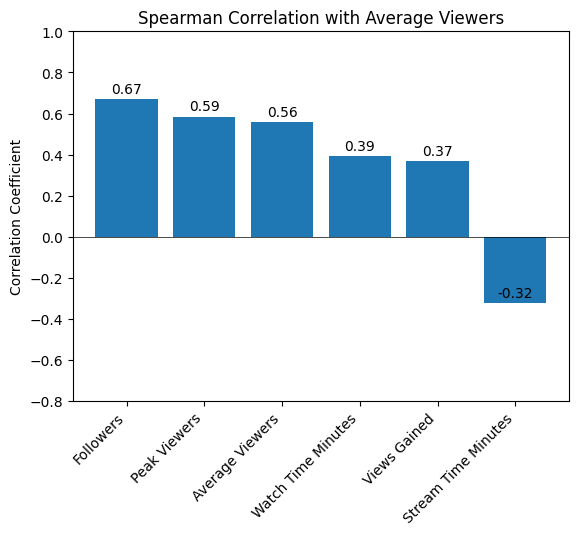

In [29]:
plt.bar(corr_fg.index, corr_fg.values)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.ylabel('Correlation Coefficient')
plt.title('Spearman Correlation with Followers Gained')
plt.ylim(-0.8, 1)

for i, v in enumerate([x for x in corr_fg]):
    plt.text(i, v + 0.03, f'{v:.2f}', ha='center')

## Exploring channel follower growth

In [11]:
# Calculate growth efficiency metrics
data['followers_per_hour'] = data['followers_gained'] / (data['stream_time_minutes'] / 60)
data['views_per_hour'] = data['views_gained'] / (data['stream_time_minutes'] / 60)
# Calculate a rough percentile rank for coloring
data['efficiency_rank'] = data['followers_per_hour'].rank(pct=True)

Text(0, 0.5, 'Channel')

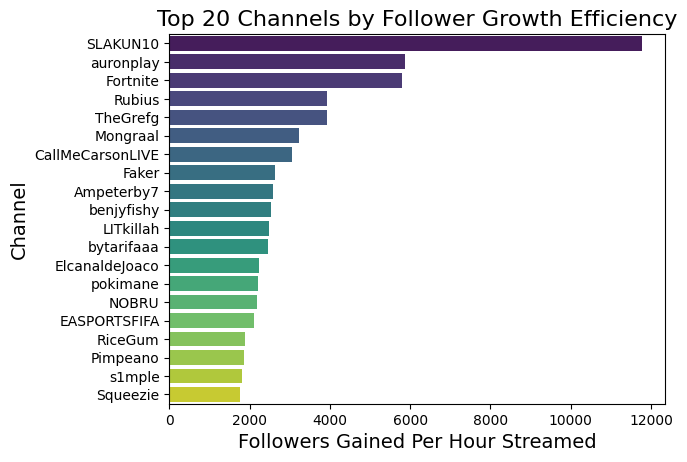

In [12]:
data_efficient = data.sort_values('followers_per_hour', ascending=False).head(20)

ax = sns.barplot(x='followers_per_hour', y='channel', hue='channel', 
                 palette='viridis', legend=False, data=data_efficient)

plt.title('Top 20 Channels by Follower Growth Efficiency', fontsize=16)
plt.xlabel('Followers Gained Per Hour Streamed', fontsize=14)
plt.ylabel('Channel', fontsize=14)

# for i, v in enumerate(data_efficient['followers_per_hour']):
#     ax.text(v + 50, i, f"{v:.0f}", va='center')

# plt.grid(axis='x', linestyle='--', alpha=0.7)

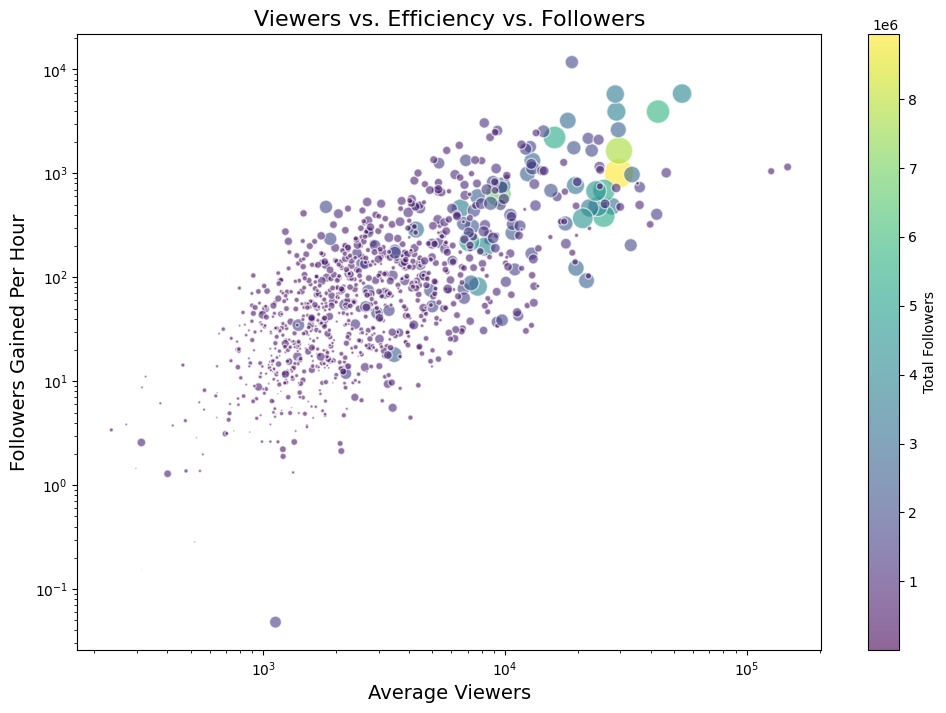

In [13]:
# sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
# Create a scatter plot with size based on total followers
scatter = plt.scatter(
    data['average_viewers'], 
    data['followers_per_hour'],
    alpha=0.6,
    c=data['followers'],  # Color based on follower count
    cmap='viridis',
    s=data['followers'].apply(lambda x: x/20000),  # Size based on followers
    # s=data['followers'].apply(lambda x: min(x/50000, 300)),  # Size based on followers
    edgecolors='w'
    )

# Add a colorbar
# Bubble size represents channel's follower count. 
cbar = plt.colorbar(scatter)
cbar.set_label('Total Followers')

plt.title('Viewers vs. Efficiency vs. Followers', fontsize=16)
plt.xlabel('Average Viewers', fontsize=14)
plt.ylabel('Followers Gained Per Hour', fontsize=14)
plt.xscale('log')
plt.yscale('log')

* Channels with more average viewers gain more followers and have more total followers
* Positive feedback loop where popular channels become more popular more quickly?

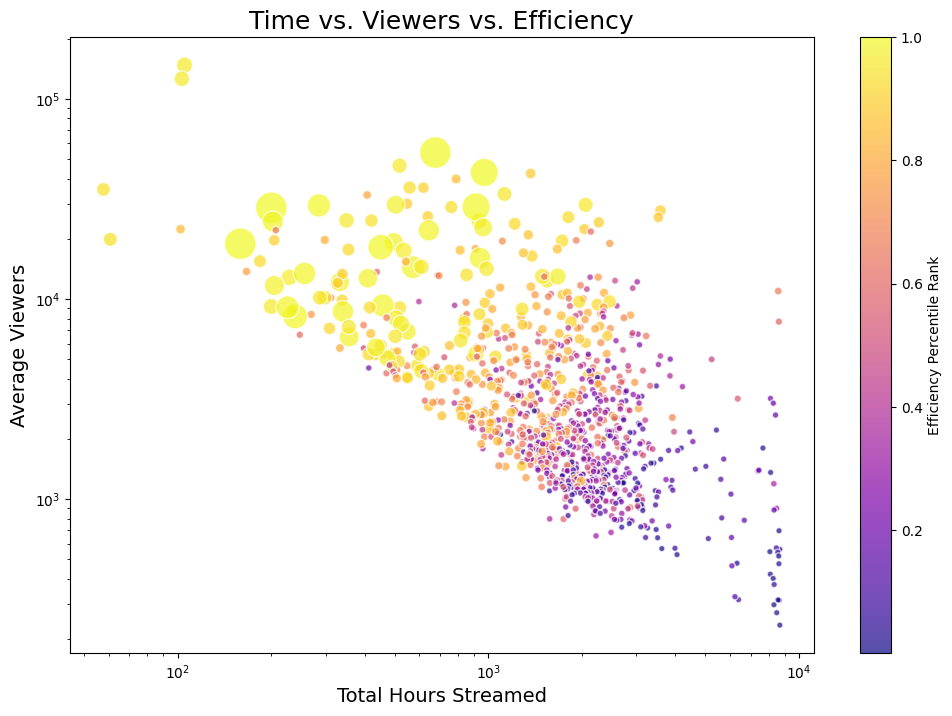

In [14]:
# Bubble chart showing three dimensions: Efficiency, Average Viewers, and Stream Time
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter = plt.scatter(data['stream_time_minutes']/60, 
                     data['average_viewers'],
                     alpha=0.7,
                     c=data['efficiency_rank'],
                     cmap='plasma',
                     s=data['followers_per_hour'].apply(lambda x: min(x/10, 500) + 20),
                     edgecolors='w')

# Add a colorbar
# Bubble size represents follower growth efficiency (followers gained per hour). Color indicates efficiency percentile.
cbar = plt.colorbar(scatter)
cbar.set_label('Efficiency Percentile Rank')

plt.title('Time vs. Viewers vs. Efficiency', fontsize=18)
plt.xlabel('Total Hours Streamed', fontsize=14)
plt.ylabel('Average Viewers', fontsize=14)
plt.yscale('log')
plt.xscale('log')

* Quality over quantity in terms of content?
* Better to be engaging rather than streaming for long periods

## Average Viewers by Language

In [15]:
language_stats = data.groupby('language').agg({
    'channel': 'count',
    'average_viewers': 'mean',
    'views_gained': 'mean',
    'followers': 'mean',
    'followers_gained': 'mean',
    'watch_time_minutes': 'mean'
}).rename(columns={'channel': 'streamer_count'}).sort_values('streamer_count', ascending=False)
language_stats['watch_time_hours'] = language_stats['watch_time_minutes'] / 60
language_stats['watchtime_per_viewer'] = language_stats['watch_time_hours'] / language_stats['average_viewers']


# language_stats
top_languages = language_stats.head(10).copy()
top_languages


,streamer_count,average_viewers,views_gained,followers,followers_gained,watch_time_minutes,watch_time_hours,watchtime_per_viewer
language,,,,,,,,
English,485,5113,12537009,705686,203294,471919599,7865327,1538
Korean,77,3914,9476194,262174,86643,360966414,6016107,1537
Russian,74,6594,16502153,339730,136864,376224456,6270408,951
Spanish,68,6450,9815709,779686,570378,376194784,6269913,972
French,66,3507,10179534,439735,181407,378074415,6301240,1797
Portuguese,61,3801,10868687,555868,247166,452488296,7541472,1984
German,49,4278,8387379,479368,172197,393960974,6566016,1535
Chinese,30,3425,10628286,201715,28210,338955981,5649266,1650
Turkish,22,4761,10866011,718936,259308,284710195,4745170,997


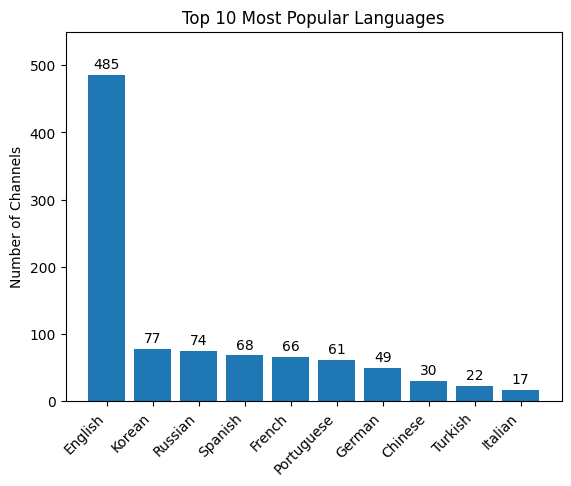

In [16]:
top_languages = top_languages.sort_values('streamer_count', ascending=False)

plt.bar(range(len(top_languages)), top_languages['streamer_count'])
plt.xticks(range(len(top_languages)), top_languages.index, rotation=45, ha='right')
plt.title('Top 10 Most Popular Languages')
plt.ylabel('Number of Channels')
plt.ylim(0, 550)

for i, v in enumerate(top_languages['streamer_count']):
    plt.text(i, v + 10, f'{v:.0f}', ha='center')

* English is by far the most popular languages (by number of streamers)

<positron-console-cell-17>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


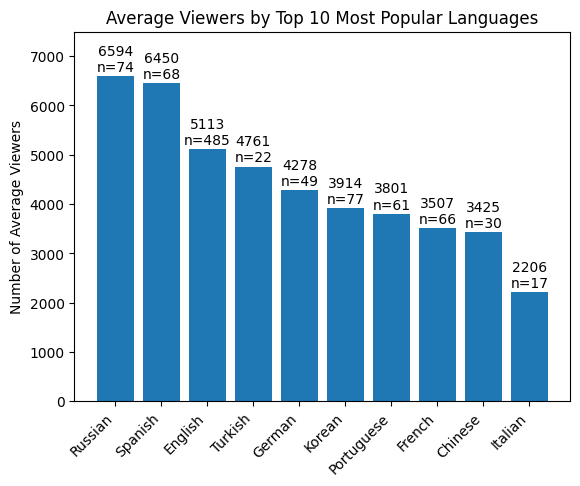

In [17]:
top_languages = top_languages.sort_values('average_viewers', ascending=False)

plt.bar(range(len(top_languages)), top_languages['average_viewers'])
plt.xticks(range(len(top_languages)), top_languages.index, rotation=45, ha='right')
plt.title('Average Viewers by Top 10 Most Popular Languages')
plt.ylabel('Number of Average Viewers')
plt.ylim(0, 7500)

for i, v in enumerate(top_languages['average_viewers']):
    plt.text(i, v + 100, f'{v:.0f}\nn={top_languages["streamer_count"][i]}', ha='center')

* More viewers per streamers than English for Russian and Spanish. Could also be a result of fewer channel options for those languages?
* Better channel growth opportunities in Russian and Spanish?

<positron-console-cell-18>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


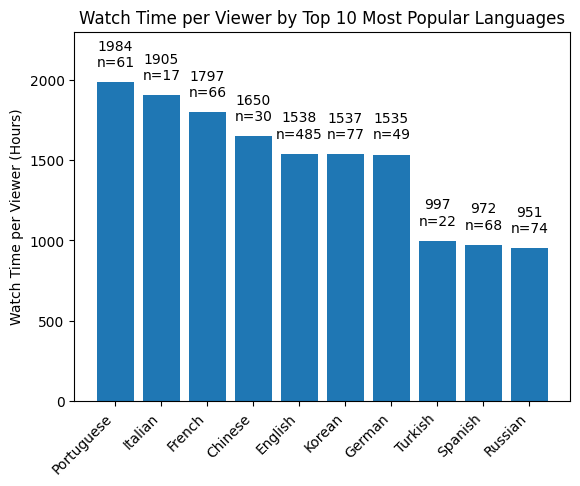

In [18]:
top_languages = top_languages.sort_values('watchtime_per_viewer', ascending=False)

plt.bar(range(len(top_languages)), top_languages['watchtime_per_viewer'])
plt.xticks(range(len(top_languages)), top_languages.index, rotation=45, ha='right')
plt.title('Watch Time per Viewer by Top 10 Most Popular Languages')
plt.ylabel('Watch Time per Viewer (Hours)')
plt.ylim(0, 2300)

for i, v in enumerate(top_languages['watchtime_per_viewer']):
    plt.text(i, v + 100, f'{v:.0f}\nn={top_languages["streamer_count"][i]}', ha='center')

<positron-console-cell-19>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


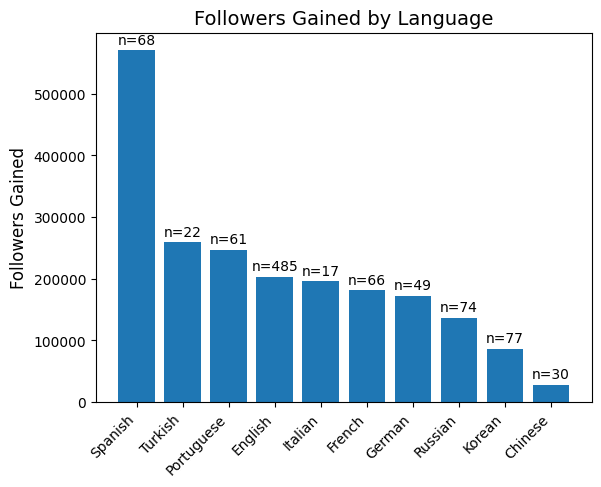

In [19]:
top_languages = top_languages.sort_values('followers_gained', ascending=False)
# sns.boxplot(x='language', y='followers_gained', data=top_languages)
plt.bar(range(len(top_languages)), top_languages['followers_gained'])
plt.xticks(range(len(top_languages)), top_languages.index, rotation=45, ha='right')
plt.title('Followers Gained by Language', fontsize=14)
plt.ylabel('Followers Gained', fontsize=12)

for i, v in enumerate(top_languages['followers_gained']):
    plt.text(i, v + 10000, f'n={top_languages["streamer_count"][i]}', ha='center')

In [21]:
# Top languages by average efficiency
# top_languages = data.groupby('language')['followers_per_hour'].mean().sort_values(ascending=False).head(5).index
# top_languages = top_languages.sort_values('followers_per_hour', ascending=False)

# # Filter data to include only top languages
# data_lang = data[data['language'].isin(top_languages)]

# sns.boxplot(x='language', y='followers_per_hour', data=data_lang)
# plt.title('Follower Growth Efficiency by Language', fontsize=14)
# plt.ylabel('Followers Gained Per Hour', fontsize=12)
# plt.yscale('log')

## Average viewers by category

In [22]:
data['mature_label'] = data['mature'].apply(lambda x: 'Mature' if x else 'Not Mature')
data['partnered_label'] = data['partnered'].apply(lambda x: 'Partnered' if x else 'Not Partnered')
data['combined_category'] = data.apply(
    lambda row: f"{'Partnered' if row['partnered'] else 'Not Partnered'} +\n {'Mature' if row['mature'] else 'Not Mature'}", 
    axis=1
)
# data.iloc[:, -3:]

partner_stats = data.groupby('partnered_label').agg({
    'channel': 'count',
    'average_viewers': 'mean',
    'views_gained': 'mean',
    'followers': 'mean',
    'followers_gained': 'mean',
    'watch_time_minutes': 'mean'
})
mature_stats = data.groupby('mature_label').agg({
    'channel': 'count',
    'average_viewers': 'mean',
    'views_gained': 'mean',
    'followers': 'mean',
    'followers_gained': 'mean',
    'watch_time_minutes': 'mean'
})
mature_stats.apply(round, axis=1)
category_stats = data.groupby('combined_category').agg({
    'channel': 'count',
    'average_viewers': 'mean',
    'views_gained': 'mean',
    'followers': 'mean',
    'followers_gained': 'mean',
    'watch_time_minutes': 'mean'
})

pm_stats = pd.concat([partner_stats, mature_stats], axis=0)
pm_stats

,channel,average_viewers,views_gained,followers,followers_gained,watch_time_minutes
Not Partnered,22,5287,17529223,331943,143304,278295633
Partnered,978,4770,11536322,575410,206918,421580190
Mature,230,3519,7654563,439831,147706,375007641
Not Mature,770,5158,12867034,608952,222787,431397627


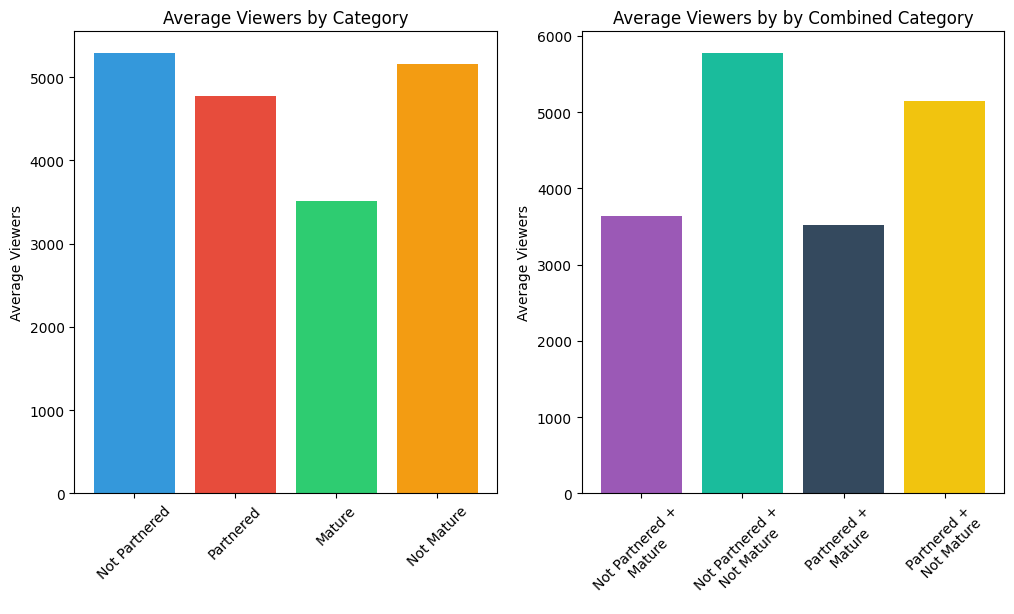

In [23]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
ax1.bar(pm_stats.index, pm_stats['average_viewers'], color=colors)
ax1.set_title('Average Viewers by Category')
ax1.set_ylabel('Average Viewers')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(
    category_stats.index, category_stats['average_viewers'], 
    color=['#9b59b6', '#1abc9c', '#34495e', '#f1c40f']
    )
ax2.set_title('Average Viewers by by Combined Category')
ax2.set_ylabel('Average Viewers')
ax2.tick_params(axis='x', rotation=45)


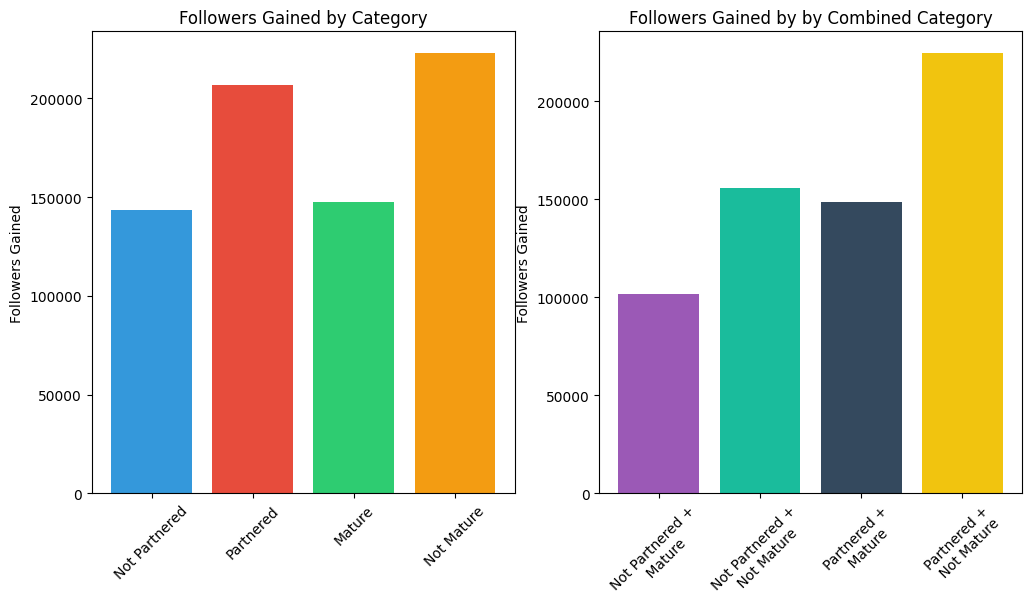

In [24]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
ax1.bar(pm_stats.index, pm_stats['followers_gained'], color=colors)
ax1.set_title('Followers Gained by Category')
ax1.set_ylabel('Followers Gained')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(
    category_stats.index, category_stats['followers_gained'], 
    color=['#9b59b6', '#1abc9c', '#34495e', '#f1c40f']
    )
ax2.set_title('Followers Gained by by Combined Category')
ax2.set_ylabel('Followers Gained')
ax2.tick_params(axis='x', rotation=45)


* Being partnered does not matter much for average followers but is potentially beneficial for growth, i.e., gaining new followers?
* Non Mature content tends to have more average viewers and more followers gained

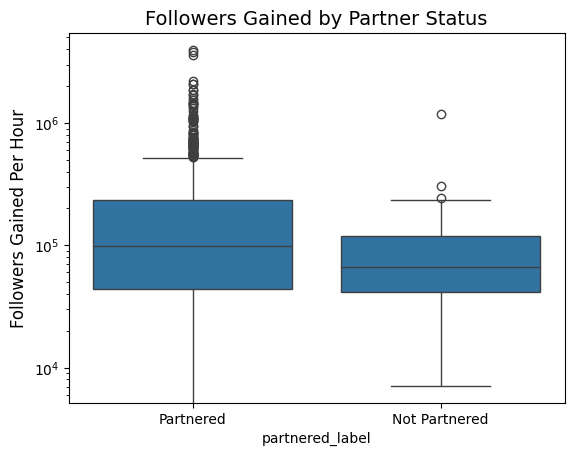

In [27]:
sns.boxplot(x='partnered_label', y='followers_gained', data=data)
plt.title('Followers Gained by Partner Status', fontsize=14)
plt.ylabel('Followers Gained Per Hour', fontsize=12)
plt.yscale('log')